### **Dataset:**

The dataset consist of 64 features and 6830 instances.
- Instances: each instance regresent a gens.
- Feature: each feature represent a cancer cell line.

**Requirment:** The requirment to clusteing the gens (instances), as following: 
- Apply dimentionality reduction PCA with 2 component
- Apply clustering (Partitioning Cluster) on first two columns (PCA 2 component) 

### **Data Collection and Preparation**

In [31]:
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load dataset
data = pd.read_csv('nci60_data.csv') 
data = data.iloc[:, 1:] # exclude the first column (ID)

### **Data Preparation**

Implement Diemntionality Reduction PCA on loaded dataset by implement `PCA` as required in assignment.

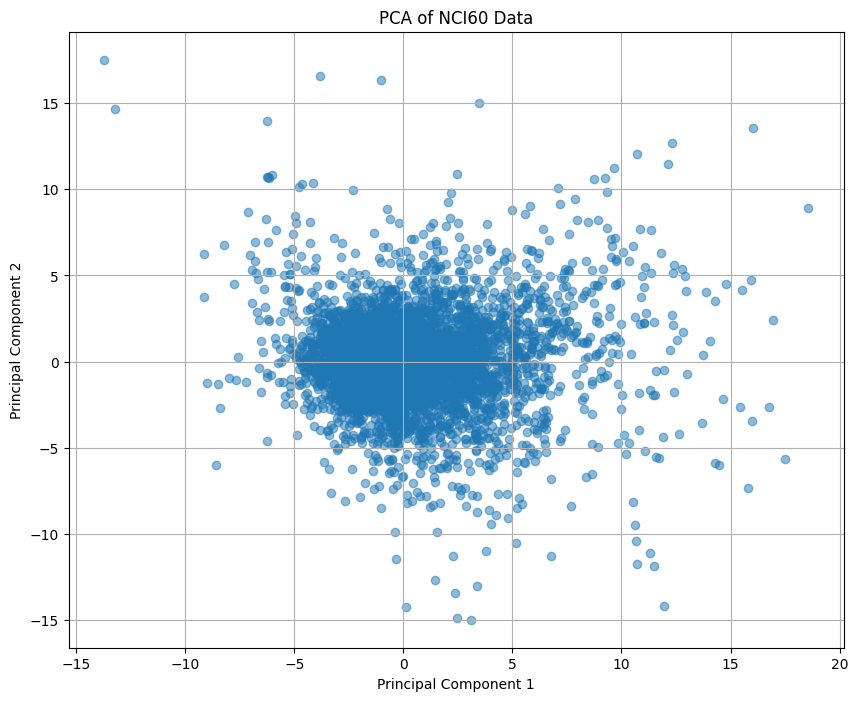

In [19]:
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Dimensionality Reduction implementioation PCA ----------------------------
#X_data = scale(data.T)
#PCA_data = PCA().fit_transform(X)
#PCA_data = pd.DataFrame(data=PCA_data, index=data.columns) # convert to DataFrame for easier plotting 
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.T)  # Transpose to ensure rows are features

# Apply PCA
pca = PCA()  # Use 2 components as per the requirement
PCA_data = pca.fit_transform(X_scaled)
PCA_data = pd.DataFrame(data=PCA_data, index=data.columns)

# Visualization -------------------------------
# show data distribution before PCA
#plt.figure(figsize=(10, 8))  # Plot the original data distribution
#plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
#plt.title('Original Data Distribution')
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
#plt.grid()
#plt.show()

# show data distribution after dimentionality reduction PCA
plt.figure(figsize=(10, 8))  # Plot the PCA results
plt.scatter(PCA_data.iloc[:, 0], PCA_data.iloc[:, 1], alpha=0.5)
plt.title('PCA of NCI60 Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

### **Heirarical Clustering (Eculidian)**

Based on the requirment in clause 1, we use heirarical algorithm cluster with following crieteria:
- **Similarity Measure:** use `Eculidian Distance` that measures straight-line distance in d-dimensional space.
- **Likage Crieteria:** use `complete linkage`, which it computes dissimilarities between all pairs of elements in the two clusters. Distance is the maximum distance between any point in A and any point in B. Produces compact, spherical clusters.

Requested Clusters: 3, Formed Clusters: 3


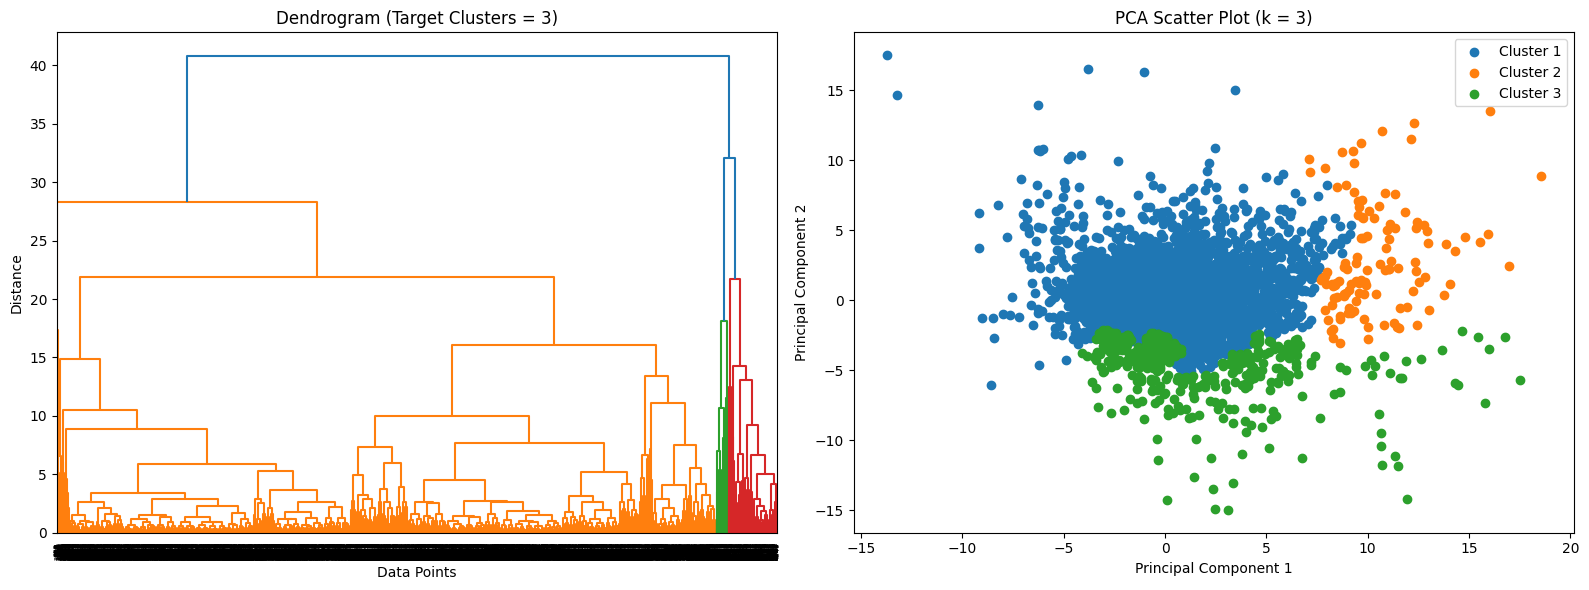

Requested Clusters: 4, Formed Clusters: 4


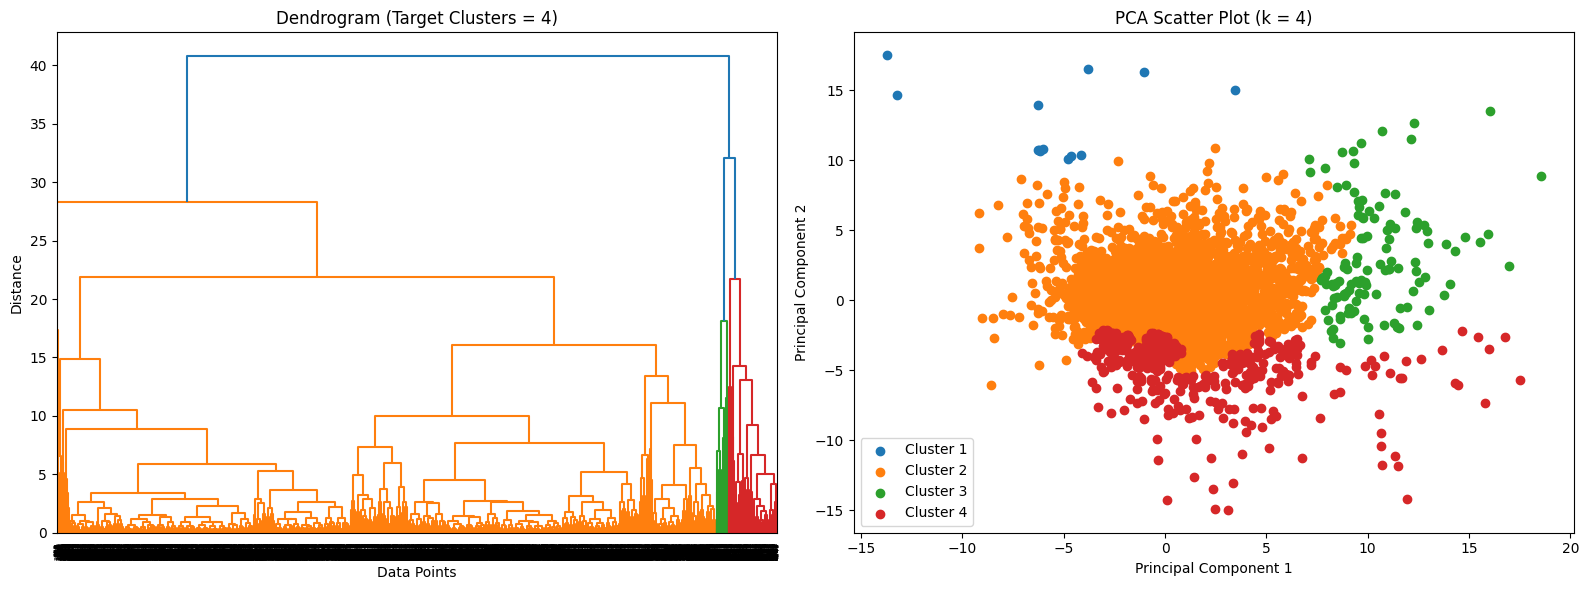

Requested Clusters: 5, Formed Clusters: 5


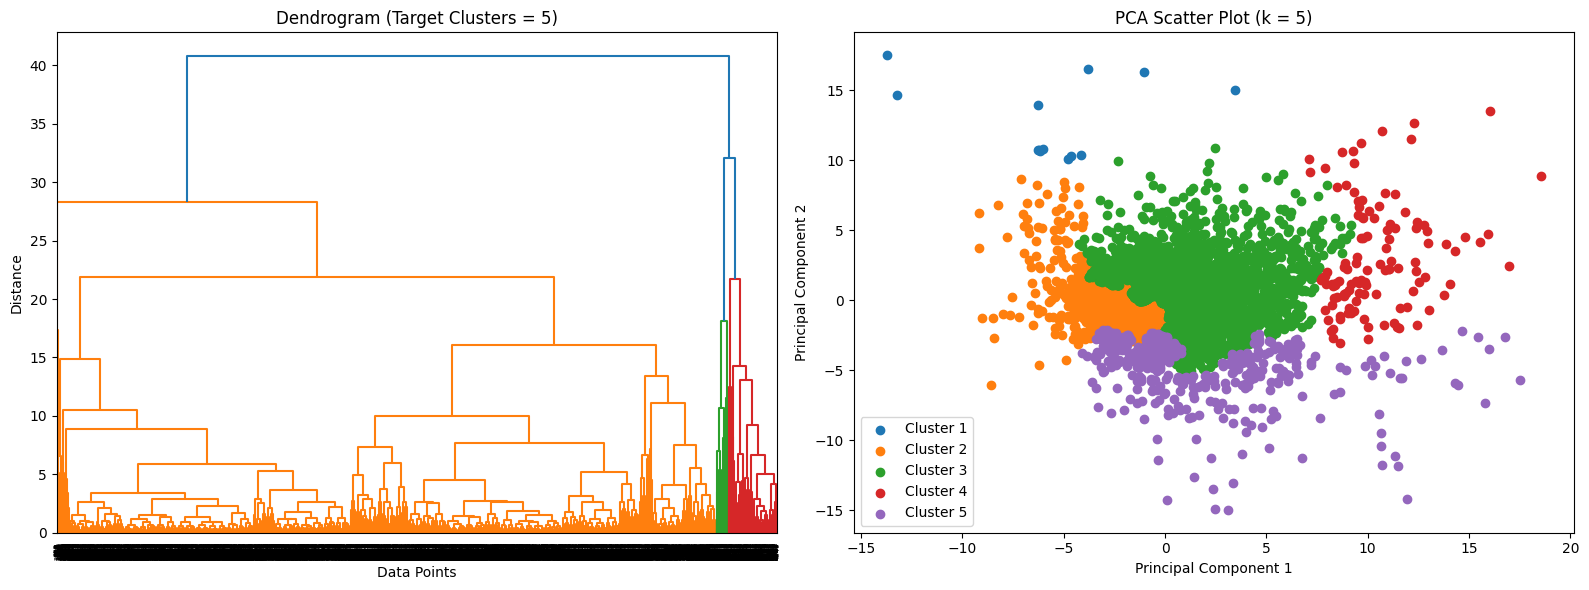

Requested Clusters: 6, Formed Clusters: 6


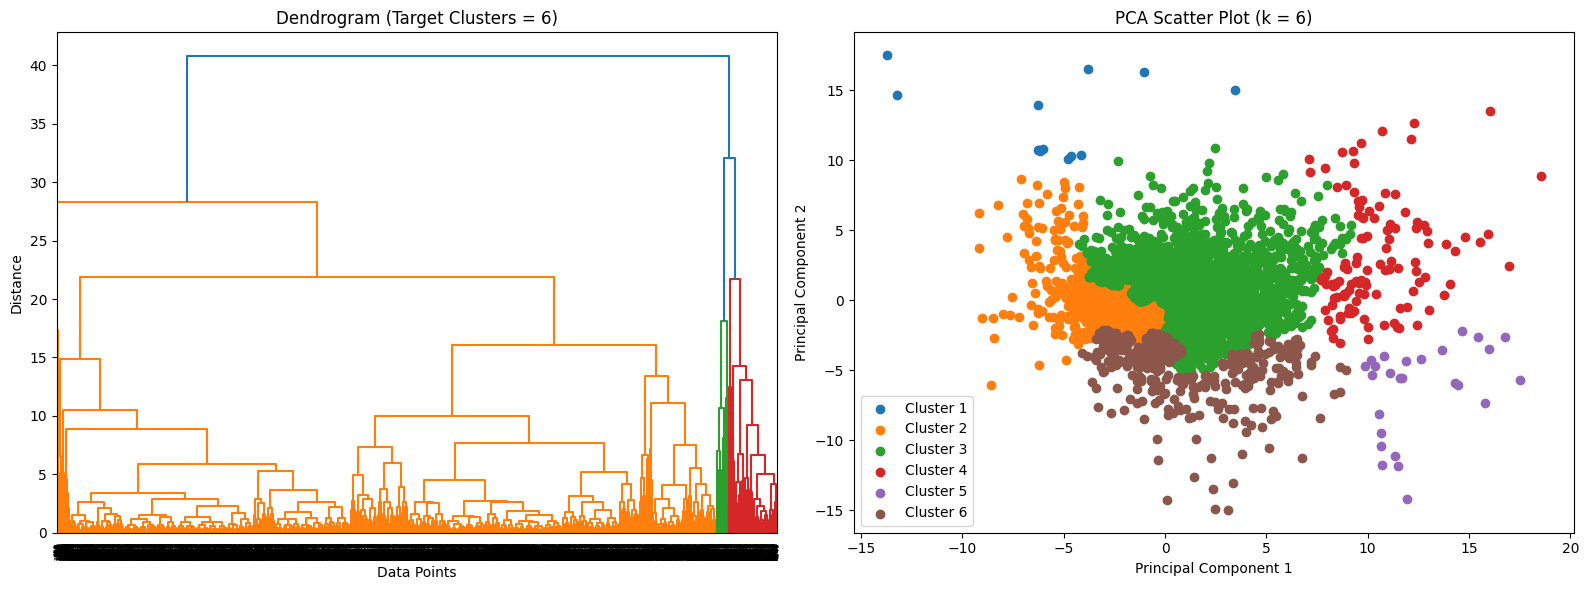

In [75]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster

# Load the Data
data = PCA_data 
X = data.iloc[:, :2]  # Use the first two PCA components

# Perform Agglomerative Clustering using Euclidean distance and complete linkage
linked = linkage(X, method='complete', metric='euclidean')

# Define the list of desired number of clusters
num_clusters_list = [3, 4, 5, 6]

# Loop over each desired number of clusters
for k in num_clusters_list:
    # Create subplots for dendrogram and scatter plot
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot the dendrogram
    dendrogram(linked, orientation='top', ax=axes[0])
    axes[0].set_title(f'Dendrogram (Target Clusters = {k})')
    axes[0].set_xlabel('Data Points')
    axes[0].set_ylabel('Distance')
    
    # Form exactly k clusters
    clusters = fcluster(linked, t=k, criterion='maxclust')
    actual_k = len(np.unique(clusters))
    print(f"Requested Clusters: {k}, Formed Clusters: {actual_k}")
    
    # Plot PCA scatter plot with cluster colors
    for cluster_id in np.unique(clusters):
        cluster_points = X.iloc[clusters == cluster_id]
        axes[1].scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster_id}')
    
    axes[1].set_title(f'PCA Scatter Plot (k = {k})')
    axes[1].set_xlabel('Principal Component 1')
    axes[1].set_ylabel('Principal Component 2')
    axes[1].legend()
    
    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()


**Clustering in PCA Space:** Each gens (Observation or instance) is colored to represent its assignment to one of six clusters.

**Scatter PLot Interpretation:**
This plot shows your data points projected onto the first two principal components (PC1 and PC2). Each point is colored according to one of the three clusters identified by cutting the dendrogram at a distance of 30 and 15.

- **Three Clusters (Target Clusters = 3):** This plot displays your data points projected onto the first two principal components (PC1 and PC2). Each point is colored according to one of the three clusters identified by the hierarchical clustering algorithm, as suggested by the dendrogram and the target of three clusters.
    - Cluster 1 (Blue): These points are predominantly located in the central region of the PCA plot, forming a dense core. This suggests a large group of data instances (likely genes, based on our previous discussion) with relatively similar expression patterns that are well-captured by the central variance in the data.
    - Cluster 2 (Orange): These points are mainly found towards the right side of the PCA plot, extending towards higher values of Principal Component 1. This indicates a group of data instances whose expression profiles differ from the central cluster, exhibiting more variation along the first principal component.
    - Cluster 3 (Green): These points are primarily situated in the lower portion of the PCA plot, tending towards lower values of Principal Component 2. This suggests another group of data instances with expression patterns distinct from the central blue cluster, characterized by variations along the second principal component.

- **Four Clusters (Target Clusters = 4):** The overall spatial distribution of the four colored clusters in the PCA scatter plot remains consistent.
    - Cluster 1 (Blue): Still located in the top-left quadrant.
    - Cluster 2 (Orange): Still forms a dense central cluster extending towards the right along PC1.
    - Cluster 3 (Green): Still primarily on the right side of the plot.
    - Cluster 4 (Red): Still situated in the bottom-center to bottom-left.

- **Five Clusters (Target Clusters = 4):** An even more refined grouping, revealing nuanced subgroups.
    - Cluster 1 (Blue): Remains in the top-left, a stable, distinct group. Suggests this group is robustly separated
    - Cluster 2 (Orange): Shifts to the upper-center, a subset of the previous central cluster. Represents a more specific "high PC1" subgroup
    - Cluster 3 (Green): Maintains its rightward position, high PC1 variance. Represents a consistent, distinct group
    - Cluster 4 (Red): Remains in the bottom-left, low PC2 variance. Another stable, distinct group
    - Cluster 5 (Purple): Emerges in the center, a sub-group from the previous orange cluster. Represents a "mid-range" group, between the core and the extremes.

- **Six Clusters (Target Clusters = 6):** The most detailed grouping, providing strong structural separation and capturing both core populations and outliers.

    - Cluster 1 (Blue): Sparse, located in the top-left quadrant. Likely represents rare or outlier observations with unique PCA profiles.
    - Cluster 2 (Orange): Compact and positioned in the upper-center. A refined subset of the central population, possibly indicating elevated PC2 values.
    - Cluster 3 (Green): Dominant and centrally located. Represents the core cluster with balanced variance across both PCA dimensions—likely the largest and most typical group.
    - Cluster 4 (Red): Clearly separated to the far right, high in PC1. Suggests a strongly distinct subgroup with specific feature dominance.
    - Cluster 5 (Purple): Distant and lower-right positioned. Likely an outlier or peripheral group with moderate PC1 and low PC2 values.
    - Cluster 6 (Brown): Dense and located below the central cluster. Represents a low-variance, coherent subgroup possibly separated by a feature range along PC2.

**Comparison:**
The hierarchical clustering analysis using Euclidean distance on PCA-transformed data was compared across three to six clusters. The three-cluster solution provided a broad segmentation with limited detail, while the four-cluster solution improved interpretability by revealing a distinct subgroup. The five-cluster solution introduced a transitional group, capturing more nuanced patterns. The six-cluster solution offered the highest granularity, isolating outliers and enhancing separation, but with added complexity. Overall, the four- and five-cluster solutions achieved a good balance between clarity and detail.


### **Heirarical Clustering (Corelated-based)**

Based on the requirment in clause 1, we use heirarical algorithm cluster with following crieteria:
- **Similarity Measure:** use `Corelated-based` that measures straight-line distance in d-dimensional space.
- **Likage Crieteria:** use `complete linkage`, which it computes dissimilarities between all pairs of elements in the two clusters. Distance is the maximum distance between any point in A and any point in B. Produces compact, spherical clusters.

Requested Clusters: 3, Formed Clusters: 3


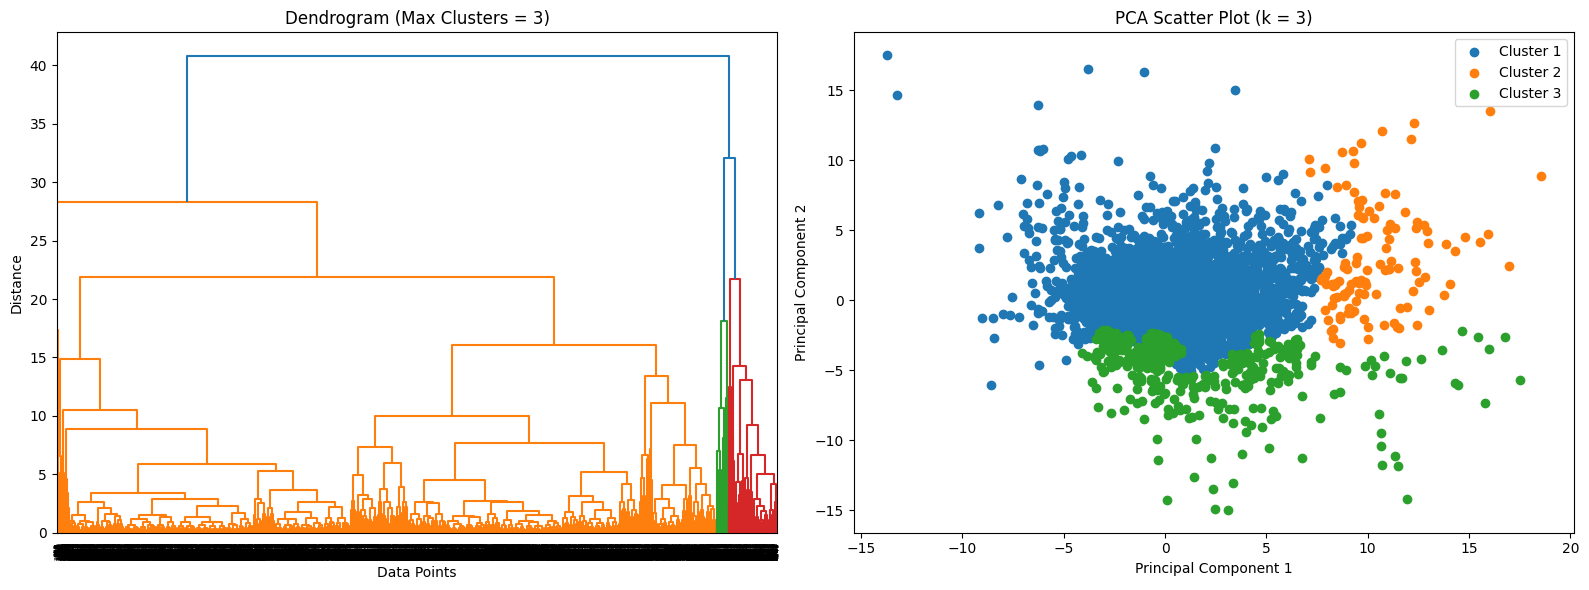

Requested Clusters: 4, Formed Clusters: 4


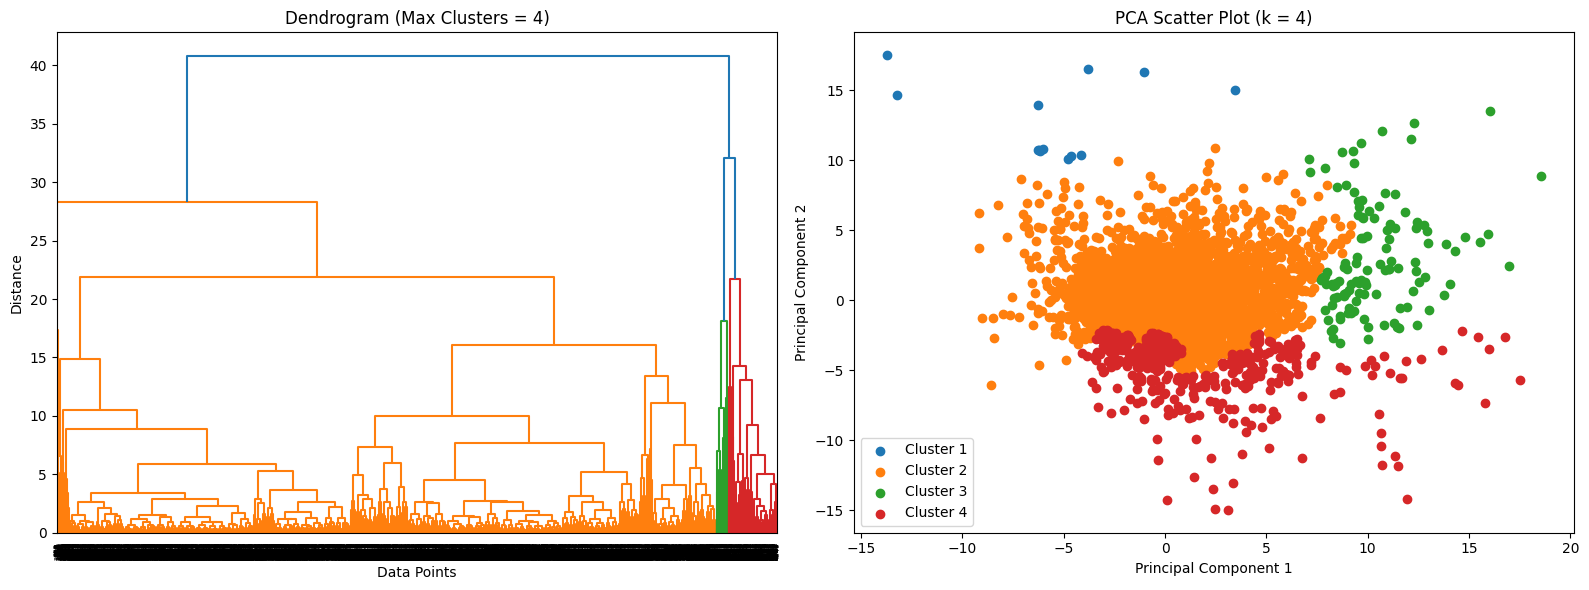

Requested Clusters: 5, Formed Clusters: 5


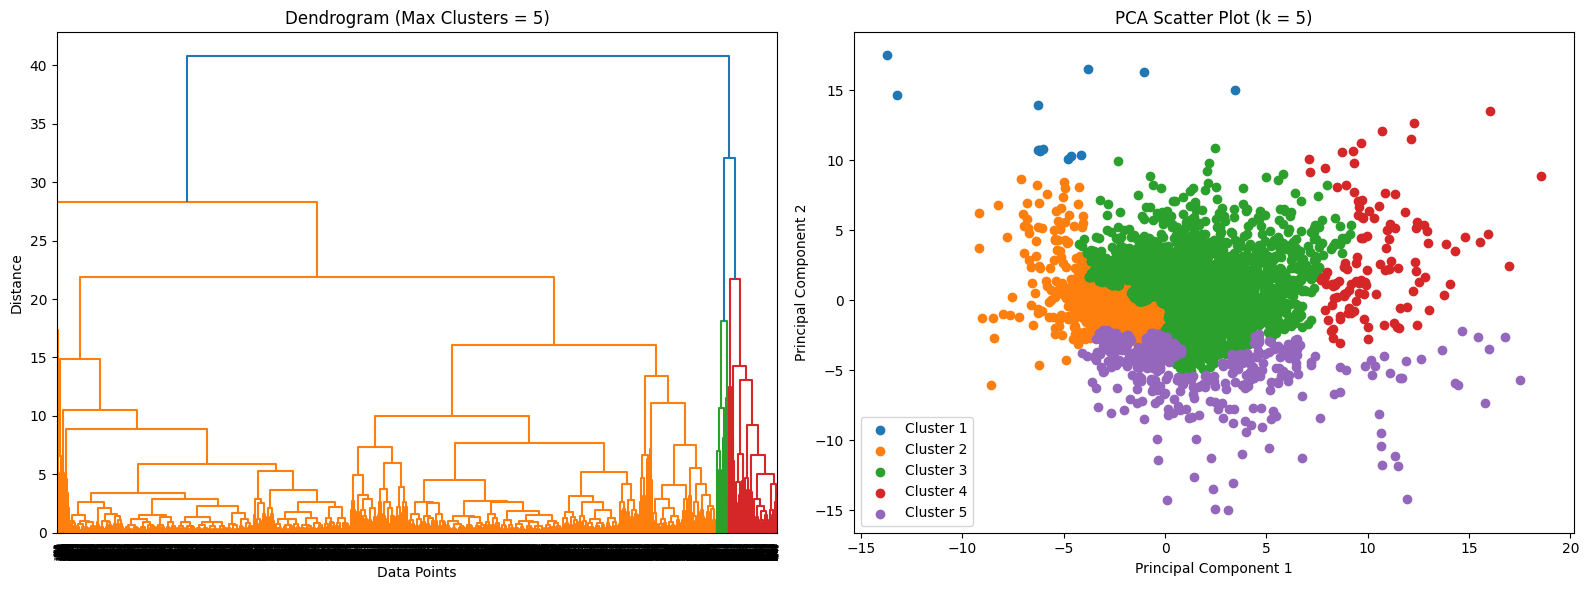

Requested Clusters: 6, Formed Clusters: 6


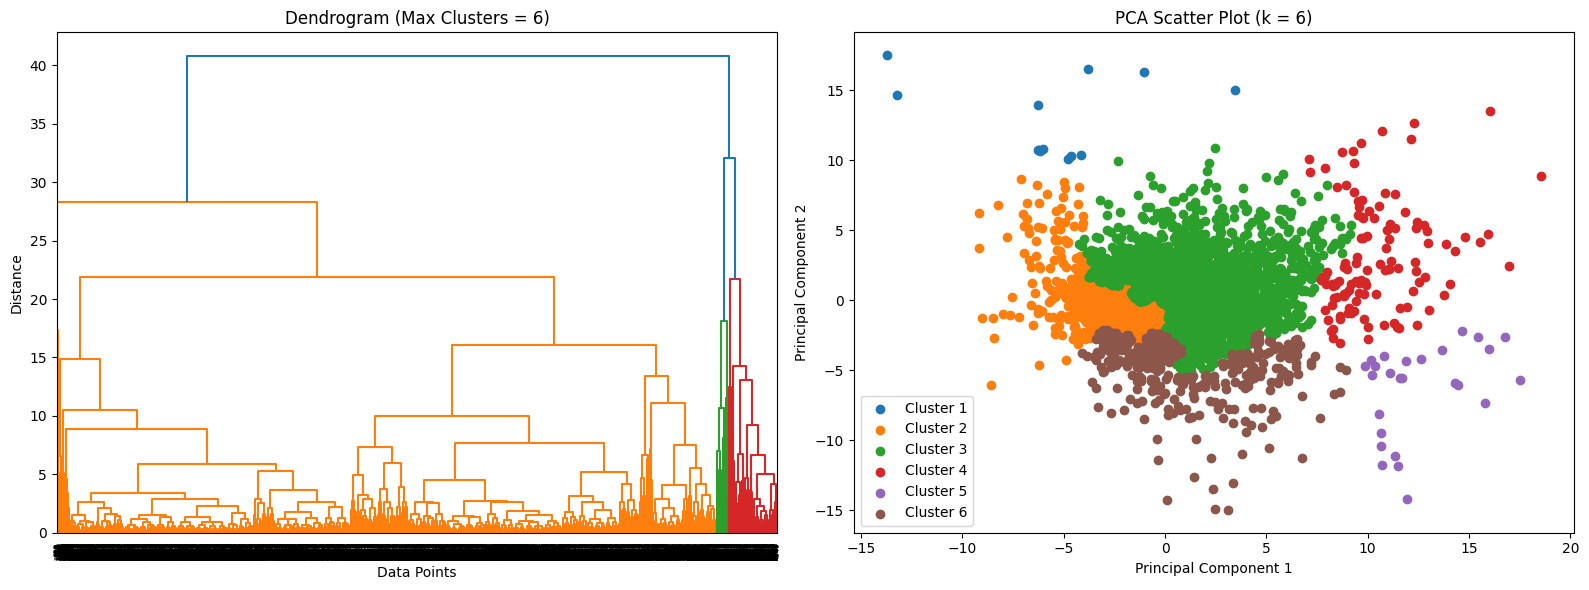

' # Load the Data\ndata = PCA_data\nX = data.iloc[:250, :2]  # Use the first two PCA components\n\n# Step 1: Compute the correlation between observations (rows)\ncorr_matrix = np.corrcoef(X)  # Correlation between instances\n\n# Step 2: Convert to correlation-based distance: 1 - |correlation|\ndistance_matrix = 1 - np.abs(corr_matrix)\n\n# Step 3: Condense the distance matrix\ncondensed_distance = pdist(X, metric=\'euclidean\')  # You can switch to squareform(corr_dist) if using correlation\n\n# Step 4: Hierarchical clustering with complete linkage\nlinked = linkage(condensed_distance, method=\'complete\')\n\n# Define desired number of clusters\nnum_clusters_list = [3, 4, 5, 6]\n\n# Loop over desired cluster counts\nfor k in num_clusters_list:\n    # Create subplots for dendrogram and scatter plot\n    fig, axes = plt.subplots(1, 2, figsize=(16, 6))\n    \n    # Plot dendrogram\n    dendrogram(linked, orientation=\'top\', ax=axes[0], labels=None)\n    axes[0].set_title(f\'Dendrogram (M

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist

# Load the Data
data = PCA_data
X = data.iloc[:, :2]  # Use the first two PCA components

# Step 1: Compute the correlation between observations (rows)
corr_matrix = np.corrcoef(X)  # Correlation between instances

# Step 2: Convert to correlation-based distance: 1 - |correlation|
distance_matrix = 1 - np.abs(corr_matrix)

# Step 3: Condense the distance matrix
condensed_distance = pdist(X, metric='euclidean')  # You can switch to squareform(corr_dist) if using correlation

# Step 4: Hierarchical clustering with complete linkage
linked = linkage(condensed_distance, method='complete')

# Define desired number of clusters
num_clusters_list = [3, 4, 5, 6]

# Loop over desired cluster counts
for k in num_clusters_list:
    # Create subplots for dendrogram and scatter plot
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot dendrogram
    dendrogram(linked, orientation='top', ax=axes[0], labels=None)
    axes[0].set_title(f'Dendrogram (Max Clusters = {k})')
    axes[0].set_xlabel('Data Points')
    axes[0].set_ylabel('Distance')
    
    # Form exactly k clusters
    clusters = fcluster(linked, t=k, criterion='maxclust')
    actual_k = len(np.unique(clusters))
    print(f"Requested Clusters: {k}, Formed Clusters: {actual_k}")
    
    # Plot scatter with cluster colors
    for cluster_id in np.unique(clusters):
        cluster_points = X.iloc[clusters == cluster_id]
        axes[1].scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster_id}')
    
    axes[1].set_title(f'PCA Scatter Plot (k = {k})')
    axes[1].set_xlabel('Principal Component 1')
    axes[1].set_ylabel('Principal Component 2')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()
# -----------------------------------------------------------------------------------------------------------
""" # Load the Data
data = PCA_data
X = data.iloc[:250, :2]  # Use the first two PCA components

# Step 1: Compute the correlation between observations (rows)
corr_matrix = np.corrcoef(X)  # Correlation between instances

# Step 2: Convert to correlation-based distance: 1 - |correlation|
distance_matrix = 1 - np.abs(corr_matrix)

# Step 3: Condense the distance matrix
condensed_distance = pdist(X, metric='euclidean')  # You can switch to squareform(corr_dist) if using correlation

# Step 4: Hierarchical clustering with complete linkage
linked = linkage(condensed_distance, method='complete')

# Define desired number of clusters
num_clusters_list = [3, 4, 5, 6]

# Loop over desired cluster counts
for k in num_clusters_list:
    # Create subplots for dendrogram and scatter plot
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot dendrogram
    dendrogram(linked, orientation='top', ax=axes[0], labels=None)
    axes[0].set_title(f'Dendrogram (Max Clusters = {k})')
    axes[0].set_xlabel('Data Points')
    axes[0].set_ylabel('Distance')
    
    # Form exactly k clusters
    clusters = fcluster(linked, t=k, criterion='maxclust')
    actual_k = len(np.unique(clusters))
    print(f"Requested Clusters: {k}, Formed Clusters: {actual_k}")
    
    # Plot scatter with cluster colors
    for cluster_id in np.unique(clusters):
        cluster_points = X.iloc[clusters == cluster_id]
        axes[1].scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster_id}')
    
    axes[1].set_title(f'PCA Scatter Plot (k = {k})')
    axes[1].set_xlabel('Principal Component 1')
    axes[1].set_ylabel('Principal Component 2')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show() """

- **Three Cluster:**The comparison between correlation-based and Euclidean-based hierarchical clustering with three clusters reveals distinct clustering behaviors. While both methods identify a dense central cluster, the correlation-based approach groups data based on similarity in patterns rather than magnitude, resulting in broader and more functionally cohesive clusters. In contrast, the Euclidean-based clustering emphasizes spatial proximity, producing more compact clusters that reflect differences in scale and position. This makes the correlation-based method more suitable for identifying structurally similar subgroups, especially in contexts like gene expression or time series data where the shape of variation matters more than absolute values.
- **Four Cluster:**
- **Five Cluster:**
- **Six Cluster:**

### **K-mean Clustering**

C:\Users\Engbo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 3, Silhouette Score: 0.02


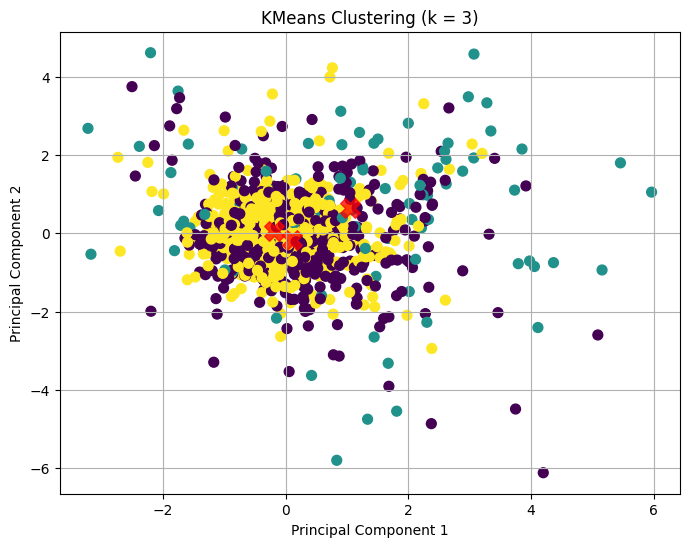

C:\Users\Engbo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 4, Silhouette Score: -0.01


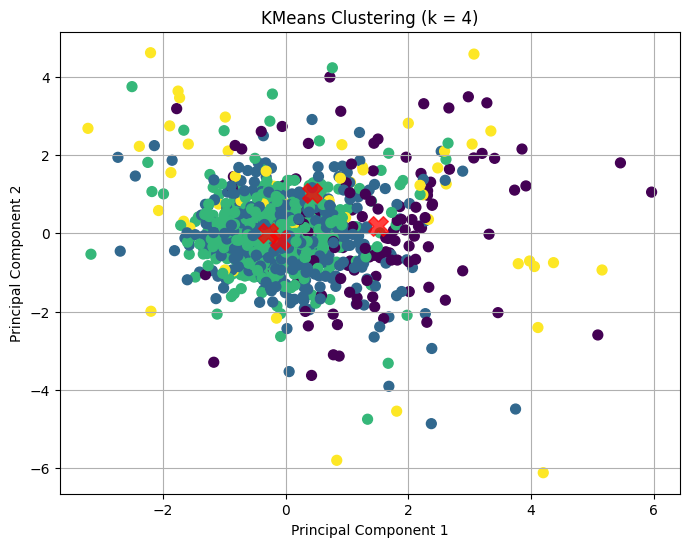

C:\Users\Engbo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 5, Silhouette Score: -0.01


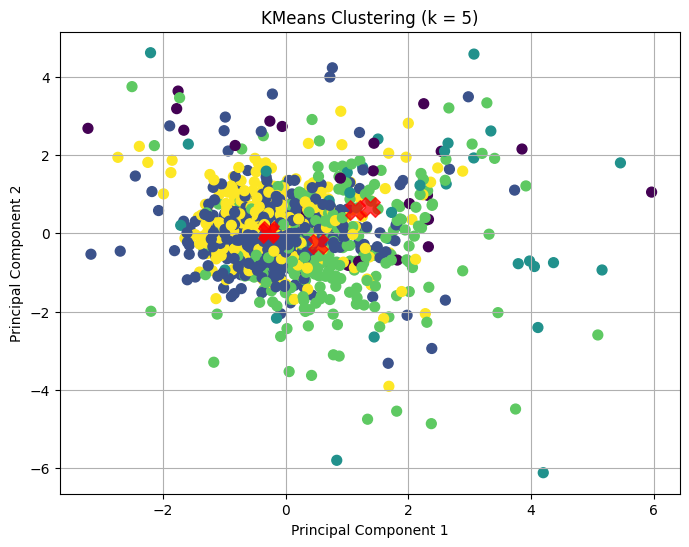

C:\Users\Engbo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 6, Silhouette Score: -0.03


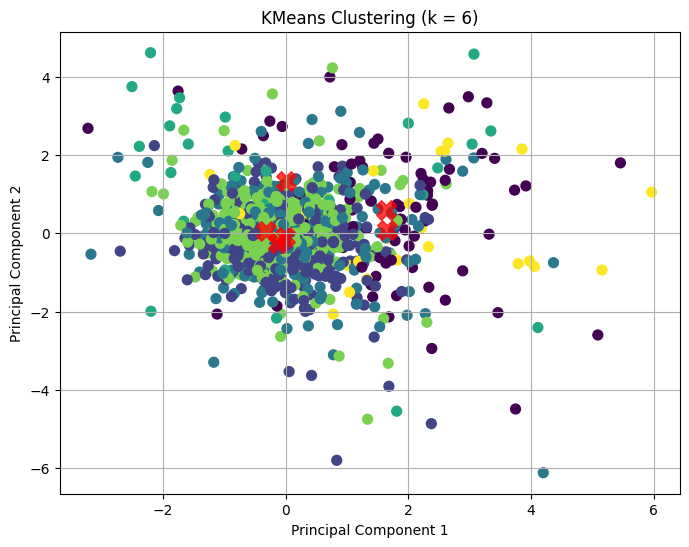

In [77]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
X = PCA_data.values
X = StandardScaler().fit_transform(X)

# Split the data
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Define list of cluster numbers to try
cluster_numbers = [3, 4, 5, 6]

# Loop over cluster numbers
for k in cluster_numbers:
    # Fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    
    # Predict cluster labels
    y_kmeans = kmeans.predict(X_test)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(X_test, y_kmeans)
    print(f'k = {k}, Silhouette Score: {silhouette_avg:.2f}')
    
    # Plot clustering result
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_kmeans, s=50, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c='red', s=200, alpha=0.75, marker='X')
    plt.title(f'KMeans Clustering (k = {k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()
plt.show() # show the plot